## Running and Evaluating Stable Pose Baseline Model

In [5]:
import subprocess
import os

#BASE_DIR = '/Users/yifansong/Desktop/cs182/proj'  # Replace with the base directory as illustrated in README
BASE_DIR = None  # Replace with the base directory as illustrated in README

# To generate the json file with predicted scores: 
subprocess.call(["python", os.path.join(BASE_DIR, "AdditiveParts/additive_parts/baseline/run_baseline.py"), BASE_DIR,
                 os.path.join(BASE_DIR, "sanitized_dict.json"), os.path.join(BASE_DIR, "sanitized_result.json")])



100%|██████████| 10/10 [00:00<00:00, 12.17it/s]


0

In [138]:
import pandas as pd
import numpy as np
import json
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [82]:
#with open("/global/scratch/users/ethantqiu/Data/stl.json", "r") as infile:
inpath = os.path.join(BASE_DIR, "sanitized_dict.json")
with open(inpath, "r") as infile:
    a_dict = json.load(infile)

In [83]:
#with open("/global/scratch/users/yifansong/stl_stablepose.json", "r") as out:
with open(os.path.join(BASE_DIR, "sanitized_result.json"), "r") as out:
    e_dict = json.load(out)

In [84]:
actual = pd.DataFrame.from_dict(a_dict,orient='index')
estimate = pd.DataFrame.from_dict(e_dict,orient='index')

In [85]:
tgt = pd.merge(left = actual, right = estimate, left_index = True, right_index = True)

In [86]:
tgt.head()

,0_x,0_y
repaired_files/90103fe5-e00e-4276-94be-db2d406a28d3.stl,1.6205615459957947,2.529934
repaired_files/90103fe5-e00e-4276-94be-db2d406a28d3.stl-100.stl,1.1769949324558115,2.010105
repaired_files/90103fe5-e00e-4276-94be-db2d406a28d3.stl0-10.stl,2.307261558057408,2.366312
repaired_files/90103fe5-e00e-4276-94be-db2d406a28d3.stl00-1.stl,1.709764946080299,2.366312
repaired_files/90103fe5-e00e-4276-94be-db2d406a28d3.stl010.stl,2.307261523514363,2.529934


In [87]:
tgt['0_x'] = (tgt['0_x']).astype(float)
tgt['0_y'] = (tgt['0_y']).astype(float)

### Classification Accuracy

In [60]:
tgt.describe()

,0_x,0_y
count,5001.000000,5001.000000
mean,15.560622,2.210698
std,33.309200,2.565571
min,0.002283,-98.000000
25%,1.725759,2.003141
50%,5.005108,2.449490
75%,12.289828,2.827959
max,329.684818,2.828427


In [69]:
x_thresh = 5.0
y_thresh = 2.449490
tgt['x_printable'] = tgt['0_x'] < x_thresh 
tgt['y_printable'] = (tgt['0_y'] < y_thresh) & (tgt['0_y'] > 0)
tgt['correct'] = (tgt['x_printable'] == tgt['y_printable']).astype('int')
tgt.head()

,0_x,0_y,x_printable,y_printable,correct
repaired_files/90103fe5-e00e-4276-94be-db2d406a28d3.stl,1.620562,2.529934,True,False,0
repaired_files/90103fe5-e00e-4276-94be-db2d406a28d3.stl-100.stl,1.176995,2.010105,True,True,1
repaired_files/90103fe5-e00e-4276-94be-db2d406a28d3.stl0-10.stl,2.307262,2.366312,True,True,1
repaired_files/90103fe5-e00e-4276-94be-db2d406a28d3.stl00-1.stl,1.709765,2.366312,True,True,1
repaired_files/90103fe5-e00e-4276-94be-db2d406a28d3.stl010.stl,2.307262,2.529934,True,False,0


In [70]:
accuracy = sum(tgt['correct']) / tgt.shape[0]
accuracy

0.5494901019796041

### regression accuracy

#### raw score capped at 20

In [88]:
#cap at 20
cap_20 = tgt[tgt['0_x'] <= 20]

In [158]:
# The code is written so that -98 is returned when compute_stable_pose returns two empty arrays, meaning that no stable pose is found. 
# Thus, we replace -98 with the most unprintable score.
cap_20 = cap_20.replace(-98.0, max(cap_20['0_y']))
cap_20.describe()

,0_x,0_y,scaled_y
count,4122.000000,4122.000000,4122.000000
mean,4.641838,2.252739,15.897146
std,4.623372,0.764266,5.393276
min,0.002283,0.000000,0.000000
25%,1.482247,2.000000,14.113616
50%,2.388039,2.449490,17.285579
75%,6.685399,2.828169,19.957848
max,19.959667,2.828427,19.959667


In [159]:
cap_20['scaled_y'] = cap_20['0_y'] * max(cap_20['0_x']) / max(cap_20['0_y'])
cap_20.describe()

,0_x,0_y,scaled_y
count,4122.000000,4122.000000,4122.000000
mean,4.641838,2.252739,15.897146
std,4.623372,0.764266,5.393276
min,0.002283,0.000000,0.000000
25%,1.482247,2.000000,14.113616
50%,2.388039,2.449490,17.285579
75%,6.685399,2.828169,19.957848
max,19.959667,2.828427,19.959667


Text(0.5, 0, 'Score')

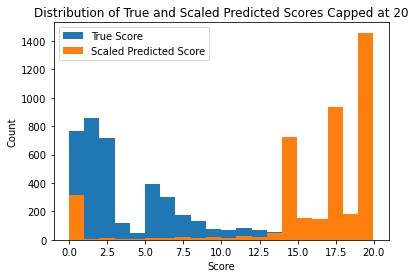

In [146]:
plt.hist(data = cap_20, x = '0_x', bins = 20, label = 'True Score')
plt.hist(data = cap_20, x = 'scaled_y', bins = 20, label = 'Scaled Predicted Score')
plt.legend()
plt.title('Distribution of True and Scaled Predicted Scores Capped at 20')
plt.ylabel('Count')
plt.xlabel('Score')

In [99]:
scaled_l1 = (np.abs(np.subtract(cap_20['0_x'],cap_20['scaled_y']))).mean()
scaled_l1

11.756919665003904

## Appendix: extra information
#### Raw score scaled by log/6 (not capped)

In [147]:
log = tgt.copy()
log = log.replace(-98.0, max(log['0_y']))
log['log_actual'] = np.log((log['0_x']).astype(float))
log['log_estimate'] = np.log((log['0_y']).astype(float))

/Users/yifansong/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [148]:
log.head()

,0_x,0_y,log_actual,log_estimate
repaired_files/90103fe5-e00e-4276-94be-db2d406a28d3.stl,1.620562,2.529934,0.482773,0.928193
repaired_files/90103fe5-e00e-4276-94be-db2d406a28d3.stl-100.stl,1.176995,2.010105,0.162965,0.698187
repaired_files/90103fe5-e00e-4276-94be-db2d406a28d3.stl0-10.stl,2.307262,2.366312,0.836061,0.861333
repaired_files/90103fe5-e00e-4276-94be-db2d406a28d3.stl00-1.stl,1.709765,2.366312,0.536356,0.861333
repaired_files/90103fe5-e00e-4276-94be-db2d406a28d3.stl010.stl,2.307262,2.529934,0.836061,0.928193


In [149]:
#Replace -infinity resulting from log(0) with the minimum of the non-infinity logs.
without_inf = log[log['log_estimate'] != min(log['log_estimate'])]
replace_0 = min(without_inf['log_estimate'])
log = log.replace(min(log['log_estimate']), replace_0)

In [150]:
log.describe()

,0_x,0_y,log_actual,log_estimate
count,5001.000000,5001.000000,5001.000000,5001.000000
mean,15.560622,2.271183,1.452016,-1.464708
std,33.309200,0.743917,1.721073,9.028851
min,0.002283,0.000000,-6.082266,-36.736801
25%,1.725759,2.004273,0.545667,0.695281
50%,5.005108,2.449490,1.610459,0.895880
75%,12.289828,2.827988,2.508772,1.039565
max,329.684818,2.828427,5.798137,1.039721


In [154]:
# As we can see from the above graph, there are some outliers near -35 that need to be accounted for.
# They will be replaced with the minimum value of the reasonable (non-outlying) scores. 
without_outlier =  log[log['log_estimate'] >= -10]
replace_outlier = min(without_outlier['log_estimate'])
to_replace = list(log[log['log_estimate'] <= -10]['log_estimate'])
log = log.replace(to_replace, replace_outlier)

In [155]:
log.describe()

,0_x,0_y,log_actual,log_estimate
count,5001.000000,5001.000000,5001.000000,5001.000000
mean,15.560622,2.271183,1.452016,0.560920
std,33.309200,0.743917,1.721073,1.159692
min,0.002283,0.000000,-6.082266,-3.739509
25%,1.725759,2.004273,0.545667,0.695281
50%,5.005108,2.449490,1.610459,0.895880
75%,12.289828,2.827988,2.508772,1.039565
max,329.684818,2.828427,5.798137,1.039721


In [164]:
log['log_actual_scaled'] = log['log_actual'] / 6
# now 'log_actual_scaled' is roughly between 1 and -1, we shift and scale log_estimate so that it has the same range as 'log_actual_scaled'
target_range = max(log['log_actual_scaled']) - min(log['log_actual_scaled'])
curr_range = max(log['log_estimate']) - min(log['log_estimate'])
factor = target_range / curr_range
log['log_estimate_scaled'] = log['log_estimate'] * factor
shift = max(log['log_actual_scaled']) - max(log['log_estimate_scaled'])
log['log_estimate_scaled'] = log['log_estimate_scaled'] + shift
log.describe()

,0_x,0_y,log_actual,log_estimate,log_actual_scaled,log_estimate_scaled
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,15.560622,2.271183,1.452016,0.560920,0.242003,0.767986
std,33.309200,0.743917,1.721073,1.159692,0.286845,0.480468
min,0.002283,0.000000,-6.082266,-3.739509,-1.013711,-1.013711
25%,1.725759,2.004273,0.545667,0.695281,0.090945,0.823653
50%,5.005108,2.449490,1.610459,0.895880,0.268410,0.906762
75%,12.289828,2.827988,2.508772,1.039565,0.418129,0.966292
max,329.684818,2.828427,5.798137,1.039721,0.966356,0.966356


Text(0.5, 0, 'Score')

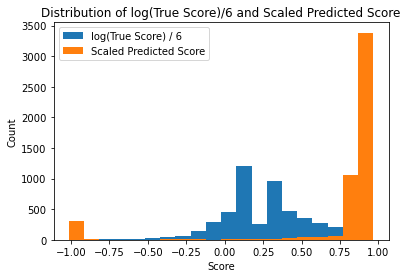

In [165]:
plt.hist(data = log, x = 'log_actual_scaled', bins = 20, label = 'log(True Score) / 6')
plt.hist(data = log, x = 'log_estimate_scaled', bins = 20, label = 'Scaled Predicted Score')
plt.legend()
plt.title('Distribution of log(True Score)/6 and Scaled Predicted Score')
plt.ylabel('Count')
plt.xlabel('Score')

In [167]:
scaled_l1_log = (np.abs(np.subtract(log['log_actual_scaled'],log['log_estimate_scaled']))).mean()
scaled_l1_log

0.6569759406946142

#### Reference Graphs

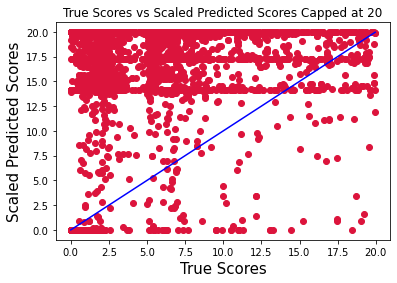

In [175]:
plt.scatter(cap_20['0_x'], cap_20['scaled_y'], c='crimson')
p1 = max(cap_20['0_x'])
p2 = min(cap_20['0_x'])
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Scores', fontsize=15)
plt.ylabel('Scaled Predicted Scores', fontsize=15)
plt.title('True Scores vs. Scaled Predicted Scores Capped at 20')
plt.show()

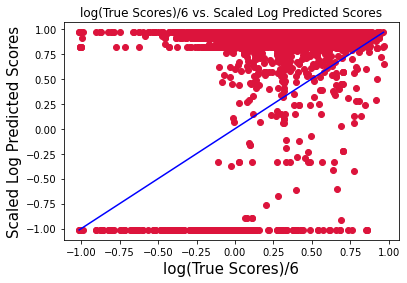

In [176]:
plt.scatter(log['log_actual_scaled'], log['log_estimate_scaled'], c='crimson')
p1 = max(log['log_estimate_scaled'])
p2 = min(log['log_estimate_scaled'])
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('log(True Scores)/6', fontsize=15)
plt.ylabel('Scaled Log Predicted Scores', fontsize=15)
plt.title('log(True Scores)/6 vs. Scaled Log Predicted Scores')
plt.show()